`Salifort Motors Employee Retention with Python`

`June 2024`

This project delivered data-driven recommendations and predictive models to the Human Resources department at Salifort Motors to identify key factors influencing employee attrition and improve retention strategies. To achieve the goal, we developed a logistic regression model along with three tree-based models, namely decision tree, random forest and XGBoost.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of contents](#table-of-contents)
1. [Executive Summary](#Executive-Summary)
   - [Overview](##Overview)
   - [Problem](#Problem)
   - [Solution](#Solution)
   - [Key insights](#Key-insights)
   - [Next steps](#Next-steps)
2. [Planning Stage](#Planning-Stage)
   - [Description of variables](#Description-of-variables)
   - [Understanding and preprocessing data](#Understanding-and-preprocessing-data)
3. [Analysing Stage](#Analysing-Stage)
   - [Exploratory data analysis](#Exploratory-data-analysis)
   - [Feature engineering](#Feature-engineering)
4. [Constructing Stage](#Constructing-Stage)
   - [Model selection](#Model-selection)
      - [Logistic regression model](#Logistic-regression-model)
      - [Decision tree model](#Decision-tree-model)
      - [Random forest model](#Random-forest-model)
      - [XGBoost model](#XGBoost-model)
5. [Executing Stage](#Executing-Stage)
   - [Conclusion](#Conclusion)

# Executive Summary

## Overview

In this project, we delivered data-driven recommendations on employee retention to the Human Resources department at Salifort Motors. We implemented the PACE framework developed by Google, namely the stages of planning, analysing, constructing and executing. Note that this approach promotes flexibility, enabling seamless transitions between stages as required.

Specifically, we tackled the business problem by leveraging Python for coding tasks. Key activities included conducting exploratory data analysis, constructing statistical and machine learning models and addressing ethical considerations inherent to the task. The findings were documented comprehensively to efficiently and effectively communicate insights to stakeholders.

## Problem

The Human Resources department at Salifort Motors is focused on improving employee satisfaction and has compiled a dataset from employee records. They are seeking the expertise of data science to generate data-driven insights from this dataset. Their primary objective is to identify the key determinants influencing employee attrition within the company.

This project aims to analyse the dataset and construct a predictive model for employee retention. By forecasting potential departures, the goal is to identify significant factors contributing to retention rates. Enhancing employee retention is paramount as the recruitment and onboarding processes are resource-intensive and financially burdensome for the organisation.

## Solution

To predict a categorical outcome, we developed a logistic regression model and three tree-based models, namely decision tree, random forest and XGBoost. All three tree-based models outperformed the logistic regression model, with the XGBoost showing the best performance among them. These models effectively predict employee turnover and identify the most influential factors, offering valuable insights for Human Resources to make informed decisions and enhance employee retention.

## Key insights

- The random forest and XGBoost models outperformed the decision tree and logistic regression models, with the XGBoost slightly outperforming the random forest.
- The most influential factors in predicting employee attrition include satisfaction level, last evaluation, time spent at the company, number of projects, and average monthly hours.
- Employees who are less satisfied are more likely to leave the company.
- Employees who work more than 200 hours per month are more likely to leave the company.
- Employees who have been with the company for four years are more likely to leave than those with less tenure.
- Employees working on more than six projects are more likely to leave the company.

## Next steps

- Inform employees about the company's overtime pay policies if they are unfamiliar.
- Clarify expectations regarding workload and time off if they are not explicit.
- Limit the number of projects employees can work on.
- Either reward employees for working longer hours or remove the requirement to do so.
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation into the dissatisfaction among four-year tenured employees.
- Evaluate employees based on a scale that proportionately rewards contributions and effort, rather than solely on the basis of working more than 200 hours per month.
- Facilitate company-wide and team-specific discussions to understand and improve the company's work culture.

# Planning Stage

The planning stage involves conceptualising the project scope and outlining steps for completion. Key tasks include researching business data, defining project scope, developing workflows and assessing stakeholder needs.

## Description of variables

| Variables | Type | Description |
|-----------|------|-------------|
| satisfaction_level | float64 | Employee reported job satisfaction level [0-1] |
| last_evaluation | float64 | Score of an employee's last performance review [0-1] |
| number_project | int64 | Number of projects an employee contributes to |
| average_monthly_hours | int64 | Average number of hours an employee worked per month |
| time_spend_company | int64 | How many years an employee has been with the company |
| work_accident | int64 | Whether or not an employee experienced an accident while at work |
| left | int64 | Whether or not an employee left the company |
| promotion_last_5_years | int64 | Whether or not an employee was promoted in the last 5 years |
| department | str | Employee's department |
| salary | str | Employee's salary (USD) [low, medium, high] |

## Understanding and preprocessing data

The dataset contains 14,999 observations and 10 variables. The target variable is 'left', which indicates whether an employee left the company. The dataset includes both numeric and categorical variables. We will process the data to ensure it is suitable for analysis.

We get a general sense of the data by examining the first few rows and the data types of each column. We also check for missing values and duplicates. We then rename columns for clarity. Next, we explore the distribution of numeric variables and the frequency of categorical variables.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import model selection and evaluation tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Load the data
df = pd.read_csv('employee.csv')

# Display a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
# Display the first few rows of the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Display the descriptive statistics of the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Rename columns for a consist format
df.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department'
}, inplace=True)

# Display updated columns
for index, value in enumerate(df.columns, start = 1):
    print(f'{index}. {value}')

1. satisfaction_level
2. last_evaluation
3. number_project
4. average_monthly_hours
5. time_spend_company
6. work_accident
7. left
8. promotion_last_5_years
9. department
10. salary


In [6]:
# Check duplicates
print(df.duplicated().sum())

# Inspect a sample of the first few rows containing duplicates
df[df.duplicated()].head()

3008


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
# Drop duplicates
df.drop_duplicates(keep = 'first')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [8]:
# Check for missing values
df.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

# Analysing Stage

The analysing stage focuses on processing and analysing project data. Tasks include formatting databases, scrubbing data, and converting data into usable formats.

## Exploratory data analysis

We start the exploratory data analysis by examining the distribution of the target variable 'left' and other features. We visualise the distribution of numeric and categorical variables using various plots to identify patterns and relationships between variables.

## Feature engineering

Feature engineering enhances machine learning models by refining and creating features from raw data. This process involves normalising, scaling, and encoding features, addressing missing data, selecting key features, and generating new variables. These practices optimise data quality and improve model performance.

Note that exploratory data analysis and feature engineering in this project are iterative and non-sequential processes that involve human augmentation and bias evolution as inherent parts of their execution.

In [9]:
# Identify and remove outliers based on z-score method

'''
- All outliers are from promotion_last_5_years.
- It seems rare for employees to be promoted in the last 5 years.
- We thus decide to keep the outliers as they are valid data points.
'''

# Ensure only numeric columns are used for z-score calculation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the mean and standard deviation for each numeric column
mean = df_numeric.mean()
std_dev = df_numeric.std()

# Define a threshold for z-scores to capture 99.99% of data
threshold = 4

# Calculate z-scores for each value in the numeric columns
z_scores = (df_numeric - mean) / std_dev

# Identify outliers
outliers = df[(np.abs(z_scores) > threshold).any(axis = 1)]

# Print number of outliers detected
print(f'Number of outliers detected: {outliers.shape[0]}')

# Remove outliers
df_no_outliers = df[~(np.abs(z_scores) > threshold).any(axis = 1)]

# Print number of records after outlier removal
print(f'Number of records after outlier removal: {df_no_outliers.shape[0]}')

# Identify which columns contain outliers
outlier_columns = (np.abs(z_scores) > threshold)

# Print the columns that contain outliers and their counts
print()
print('Number of outliers in each column:')
for column in outlier_columns.columns:
    num_outliers = outlier_columns[column].sum()
    if num_outliers > 0:
        print(f'{column}: {num_outliers}')

Number of outliers detected: 517
Number of records after outlier removal: 14482

Number of outliers in each column:
time_spend_company: 214
promotion_last_5_years: 319


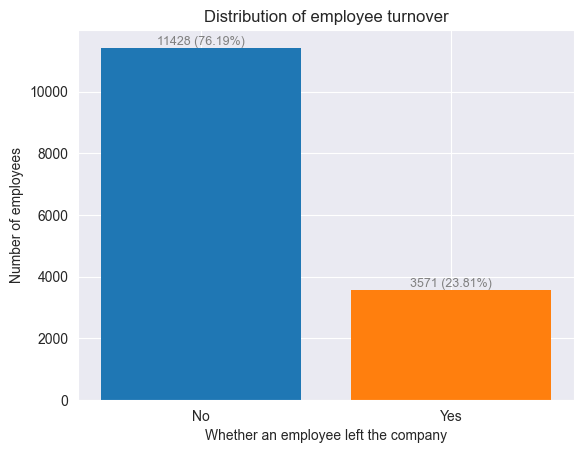

In [10]:
# Employee turnover

# Calculate value counts for left column
counts = df['left'].value_counts()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Choose a seaborn colour palette based on the number of counts
palette = sns.color_palette()

# Create the bar chart with chosen palette
plt.figure()
plt.bar(counts.index, counts.values, color = palette, edgecolor = 'None')

# Set the titles and labels
plt.title('Distribution of employee turnover')
plt.xlabel('Whether an employee left the company')
plt.ylabel('Number of employees')

# Set the x-axis ticks and labels
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate each bar with its count value and percentage
total = sum(counts)
for index, value in enumerate(counts):
    percentage = f'{(value / total * 100):.2f}%'
    plt.text(index, value + 0.1, f'{value} ({percentage})', ha = 'center', va = 'bottom', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

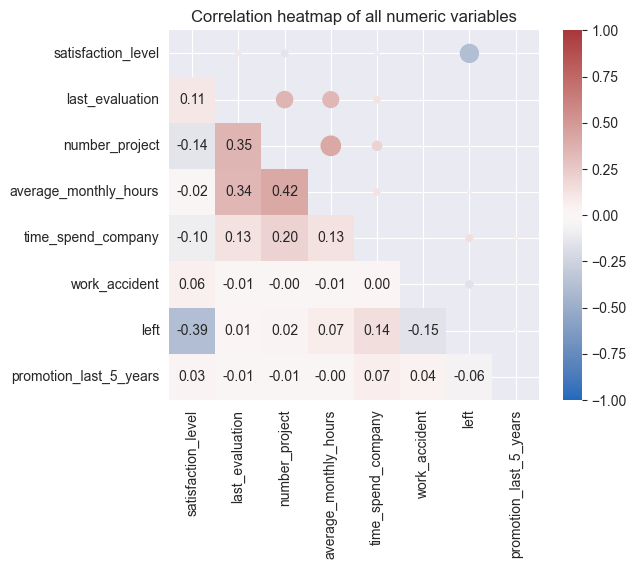

In [11]:
# Check correlations between variables

# Identify and exclude non-numeric columns
numeric_columns = df.select_dtypes(include = ['float64', 'int64']).columns

# Calculate correlations using numeric columns only
correlation_df = df[numeric_columns].corr()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype = bool))

# Plot the correlation heatmap for the lower triangle
plt.figure()
sns.heatmap(data=correlation_df, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', fmt = '.2f')

# Get the colormap and normalisation
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(-1, 1)  # Normalise based on the correlation range

# Overlay circles on the upper triangle
for i in range(len(correlation_df.columns)):
    for j in range(i + 1, len(correlation_df.columns)):
        # Get the correlation value
        corr_val = correlation_df.iloc[i, j]
        # Define the circle's radius based on the correlation value
        radius = abs(corr_val) * 0.5  # Adjust multiplier for better scaling
        # Get the color from the colormap
        color = cmap(norm(corr_val))  # Get RGBA color
        # Calculate circle position
        x, y = j + 0.5, i + 0.5
        # Plot circle
        plt.gca().add_patch(plt.Circle((x, y), radius, color = color))

# Ensure aspect ratio is equal to make circles appear round
plt.gca().set_aspect('equal', 'box')

# Set the title
plt.title('Correlation heatmap of all numeric variables')

# Display the plot
plt.show()

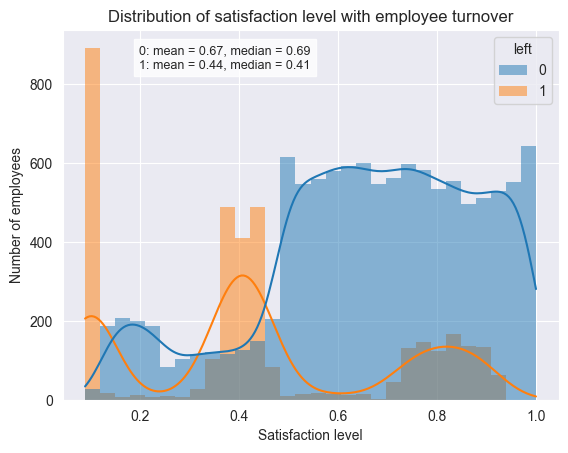

In [12]:
# Distribution of satisfaction level with number of people left

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Create the histogram
sns.histplot(data = df, x = 'satisfaction_level', hue = 'left', multiple = 'layer', kde = True, edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which='both')

# Set the titles and labels
ax.set_title('Distribution of satisfaction level with employee turnover')
ax.set_xlabel('Satisfaction level')
ax.set_ylabel('Number of employees')

# Calculate mean and median for each group
left_values = df[df['left'] == 1]['satisfaction_level']
stayed_values = df[df['left'] == 0]['satisfaction_level']

# Format and add mean and median text
mean_median_text = (
    f'0: mean = {stayed_values.mean():.2f}, median = {stayed_values.median():.2f}\n'
    f'1: mean = {left_values.mean():.2f}, median = {left_values.median():.2f}'
)

# Add mean and median information as text in the plot
ax.text(0.5, 0.96, mean_median_text, ha = 'right', va='top',transform = ax.transAxes,
        fontsize = 9, bbox = dict(facecolor = 'white', alpha = 0.8))

# Display the plot
plt.show()

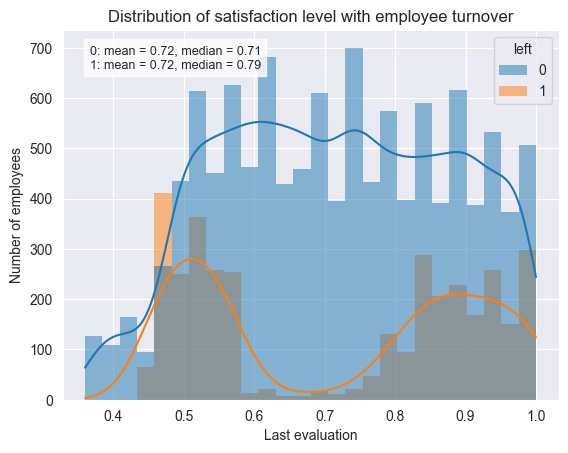

In [13]:
# Distribution of last evaluation with number of people left

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Create the histogram
sns.histplot(data = df, x = 'last_evaluation', hue = 'left', multiple = 'layer',
             kde = True, edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of satisfaction level with employee turnover')
ax.set_xlabel('Last evaluation')
ax.set_ylabel('Number of employees')

# Calculate mean and median for each group
left_values = df[df['left'] == 1]['last_evaluation']
stayed_values = df[df['left'] == 0]['last_evaluation']

# Format and add mean and median text
mean_median_text = (
    f'0: mean = {stayed_values.mean():.2f}, median = {stayed_values.median():.2f}\n'
    f'1: mean = {left_values.mean():.2f}, median = {left_values.median():.2f}'
)

# Add mean and median information as text in the plot
ax.text(0.4, 0.96, mean_median_text, ha = 'right', va='top', transform = ax.transAxes, fontsize = 9, bbox = dict(facecolor = 'white', alpha = 0.8))

# Display the plot
plt.show()

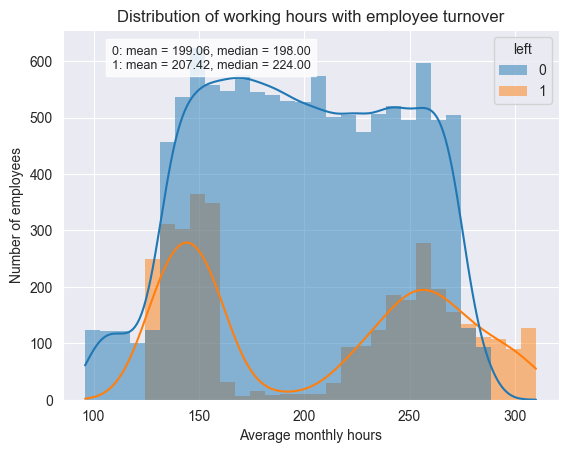

In [14]:
# Distribution of project counts with number of people left

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create the histogram
sns.histplot(data = df, x = 'average_monthly_hours', hue = 'left', multiple = 'layer',
             kde = True, edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of working hours with employee turnover')
ax.set_xlabel('Average monthly hours')
ax.set_ylabel('Number of employees')

# Calculate mean and median for each group
left_values = df[df['left'] == 1]['average_monthly_hours']
stayed_values = df[df['left'] == 0]['average_monthly_hours']

# Format and add mean and median text
mean_median_text = (
    f'0: mean = {stayed_values.mean():.2f}, median = {stayed_values.median():.2f}\n'
    f'1: mean = {left_values.mean():.2f}, median = {left_values.median():.2f}'
)

# Add mean and median information as text in the plot
ax.text(0.5, 0.96, mean_median_text, ha = 'right', va='top', transform = ax.transAxes, fontsize = 9, bbox = dict(facecolor = 'white', alpha = 0.8))

# Display the plot
plt.show()

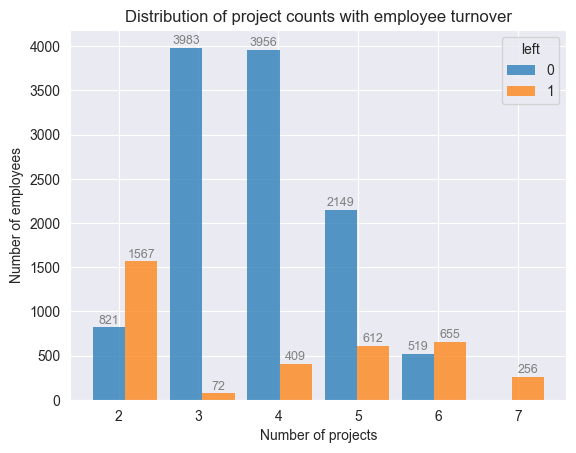

In [15]:
# Distribution of project counts with number of people left

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create the histogram
sns.histplot(data = df, x = 'number_project', hue = 'left', multiple = 'dodge',
             edgecolor = 'None', ax = ax, shrink = 5)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of project counts with employee turnover')
ax.set_xlabel('Number of projects')
ax.set_ylabel('Number of employees')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

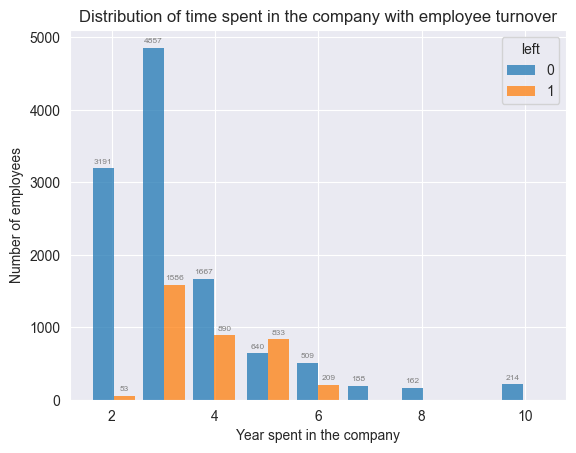

In [16]:
# Distribution of time spent in the company with number of people left

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Create the histogram
sns.histplot(data = df, x = 'time_spend_company', hue = 'left', multiple = 'dodge',
             edgecolor = 'None', ax = ax, shrink = 10)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of time spent in the company with employee turnover')
ax.set_xlabel('Year spent in the company')
ax.set_ylabel('Number of employees')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 6, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

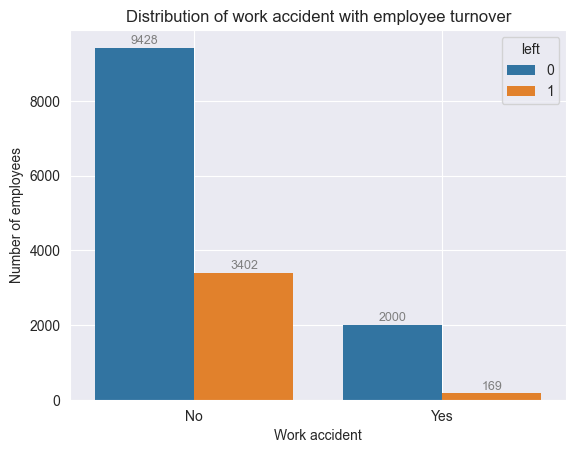

In [17]:
# Distribution of work accident with employee turnover

# Group by work accident and left, then calculate the counts
counts = df.groupby(['work_accident', 'left']).size().reset_index(name='count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(data = counts, x = 'work_accident', y = 'count', hue = 'left',
            edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of work accident with employee turnover')
ax.set_xlabel('Work accident')
ax.set_ylabel('Number of employees')

# Set the x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

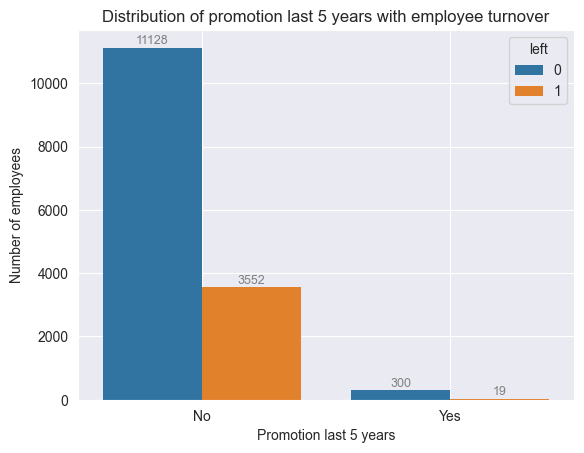

In [18]:
# Distribution of promotion last 5 years with with employee turnover

# Group by promotion last 5 years and left, then calculate the counts
counts = df.groupby(['promotion_last_5_years', 'left']).size().reset_index(name='count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(data = counts, x = 'promotion_last_5_years', y = 'count', hue = 'left',
            edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of promotion last 5 years with employee turnover')
ax.set_xlabel('Promotion last 5 years')
ax.set_ylabel('Number of employees')

# Set the x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

In [19]:
# Define the mapping dictionary for department
department_mapping = {
    'IT': 'IT',
    'RandD': 'R&D',
    'accounting': 'Accounting',
    'hr': 'HR',
    'management': 'Management',
    'marketing': 'Marketing',
    'product_mng': 'Product',
    'sales': 'Sales',
    'support': 'Support',
    'technical': 'Technical'
}

# Replace values in the 'department' column
df['department'] = df['department'].replace(department_mapping)

# Print unique values
print(df['department'].unique())

['Sales' 'Accounting' 'HR' 'Technical' 'Support' 'Management' 'IT'
 'Product' 'Marketing' 'R&D']


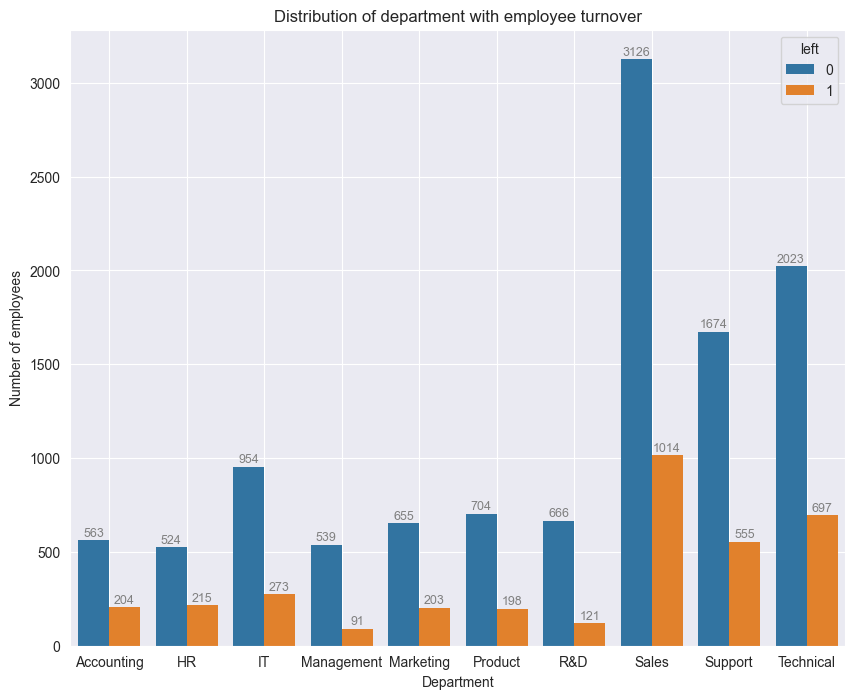

In [20]:
# Distribution of department with employee turnover

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Group by department and left, then calculate the counts
counts = df.groupby(['department', 'left']).size().reset_index(name = 'count')
   
# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots(figsize = (10, 8))

# Create the bar plot
sns.barplot(data = counts, x = 'department', y = 'count', hue = 'left', hue_order = [0, 1],
            edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of department with employee turnover')
ax.set_xlabel('Department')
ax.set_ylabel('Number of employees')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

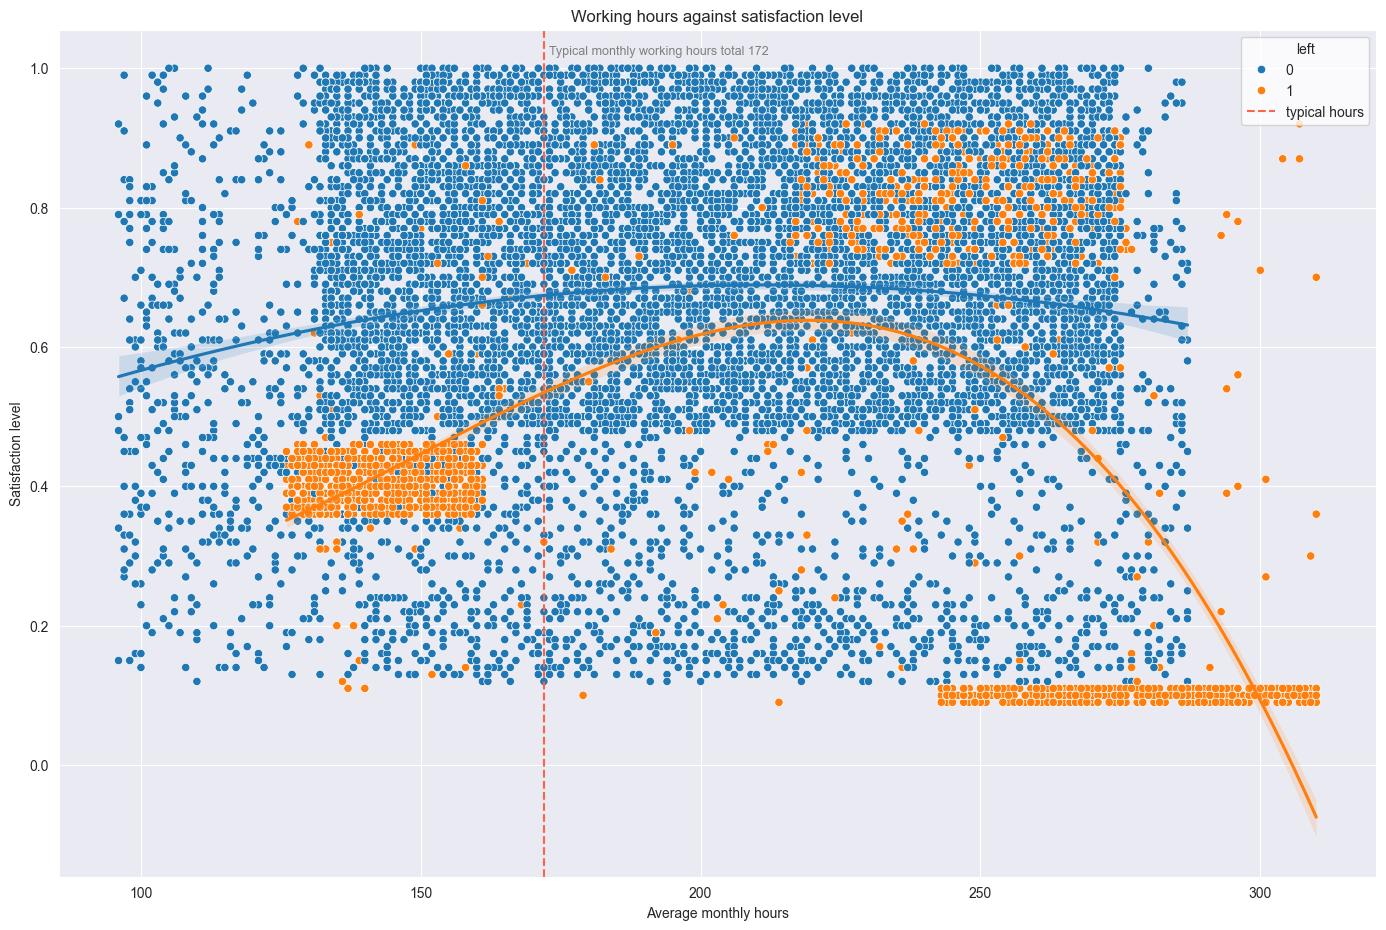

In [21]:
# Average monthly hours against satisfaction level

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a scatterplot
plt.figure(figsize = (17, 11))
sns.scatterplot( x = df['average_monthly_hours'], y = df['satisfaction_level'], hue = df['left'])
plt.axvline(x = 172, color = 'tomato', ls = '--', label='typical hours')

# Add regression lines
sns.regplot(data=df[df['left'] == 0], x = 'average_monthly_hours', y ='satisfaction_level', scatter = False, order = 3)
sns.regplot(data=df[df['left'] == 1], x = 'average_monthly_hours', y ='satisfaction_level', scatter = False, order = 3)

# Add legend
plt.legend(title = 'left', loc = 'upper right', facecolor = 'white')

# Add text 'Typical' next to the vertical line
plt.text(173, 1.02, 'Typical monthly working hours total 172', color = 'gray', fontsize = 9, ha = 'left')

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
plt.title('Working hours against satisfaction level')
plt.xlabel('Average monthly hours')
plt.ylabel('Satisfaction level')

# Display the plot
plt.show()

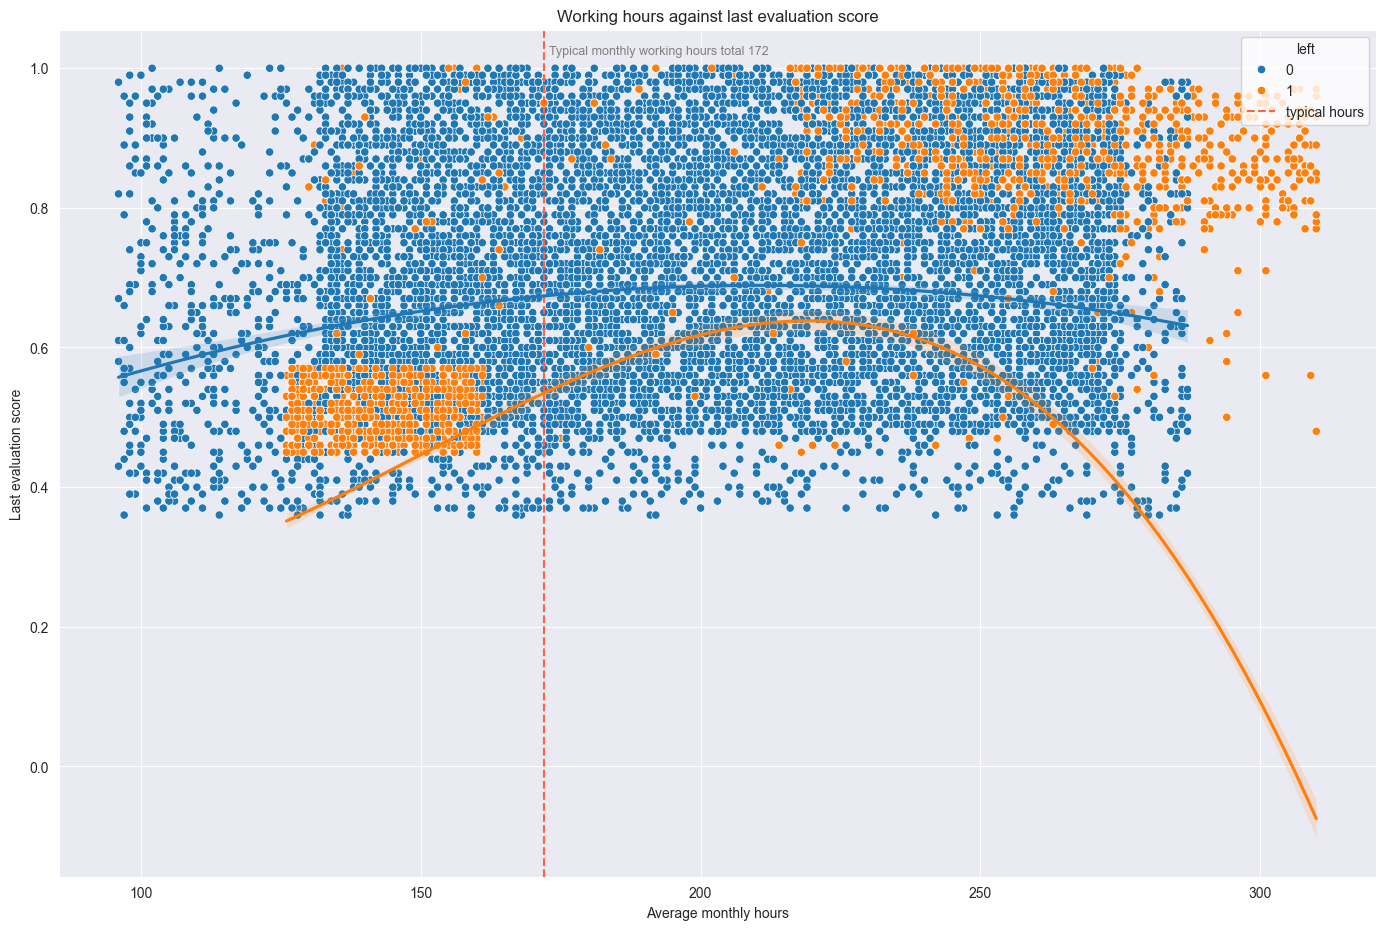

In [22]:
# Average monthly hours against last evaluation score

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a scatterplot
plt.figure(figsize = (17, 11))
sns.scatterplot( x = df['average_monthly_hours'], y = df['last_evaluation'], hue = df['left'])
plt.axvline(x = 172, color = 'tomato', ls = '--', label='typical hours')

# Add text 'Typical' next to the vertical line
plt.text(173, 1.02, 'Typical monthly working hours total 172', color = 'gray', fontsize = 9, ha = 'left')

# Add regression lines
sns.regplot(data=df[df['left'] == 0], x = 'average_monthly_hours', y ='satisfaction_level', scatter = False, order = 3)
sns.regplot(data=df[df['left'] == 1], x = 'average_monthly_hours', y ='satisfaction_level', scatter = False, order = 3)

# Add legend
plt.legend(title = 'left', loc = 'upper right', facecolor = 'white')

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
plt.title('Working hours against last evaluation score')
plt.xlabel('Average monthly hours')
plt.ylabel('Last evaluation score')

# Display the plot
plt.show()

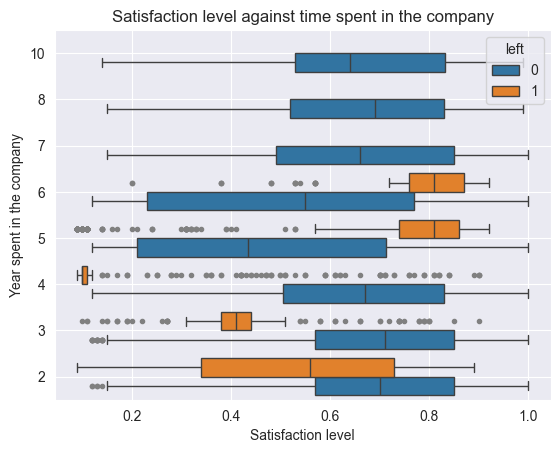

In [23]:
# Satisfaction level against time spent in the company 

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the box plot
fig, ax = plt.subplots()

# Create the box plot with swapped axes
sns.boxplot(data=df, x='satisfaction_level', y='time_spend_company', orient='h', hue = 'left', ax = ax,
            flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'gray', markeredgecolor = 'gray'))
ax.invert_yaxis()

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Satisfaction level against time spent in the company')
ax.set_xlabel('Satisfaction level')
ax.set_ylabel('Year spent in the company')

# Display the plot
plt.show()

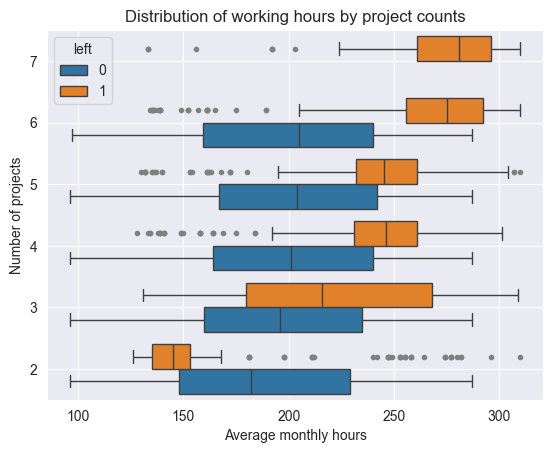

In [24]:
# Compare average monthly hours with number of projects

# Create a figure with a single subplot for the box plot
fig, ax = plt.subplots()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create the box plot with swapped axes
sns.boxplot(data = df, x = 'average_monthly_hours', y = 'number_project', orient = 'h', hue = 'left', ax = ax,
            flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'gray', markeredgecolor = 'gray'))
ax.invert_yaxis()

# Customize grid
ax.grid(True, which = 'both')

# Set the titles and labels for the box plot
ax.set_title('Distribution of working hours by project counts')
ax.set_xlabel('Average monthly hours')
ax.set_ylabel('Number of projects')

# Display the plot
plt.show()

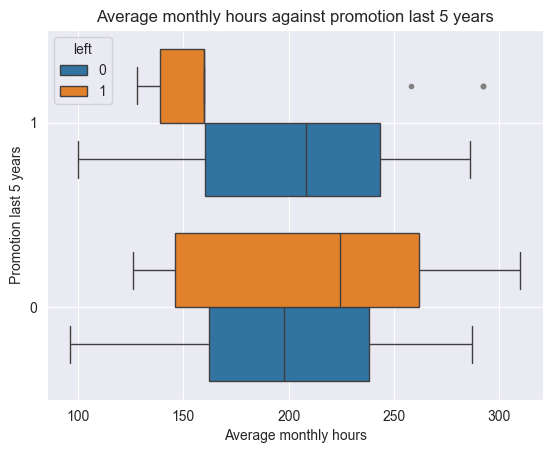

In [25]:
# Average monthly hours against promotion last 5 years

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the box plot
fig, ax = plt.subplots()

# Create the box plot
sns.boxplot(data = df, x ='average_monthly_hours', y = 'promotion_last_5_years', orient = 'h', hue = 'left', ax = ax,
           flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'gray', markeredgecolor = 'gray'))
ax.invert_yaxis()

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Average monthly hours against promotion last 5 years')
ax.set_xlabel('Average monthly hours')
ax.set_ylabel('Promotion last 5 years')

# Display the plot
plt.show()

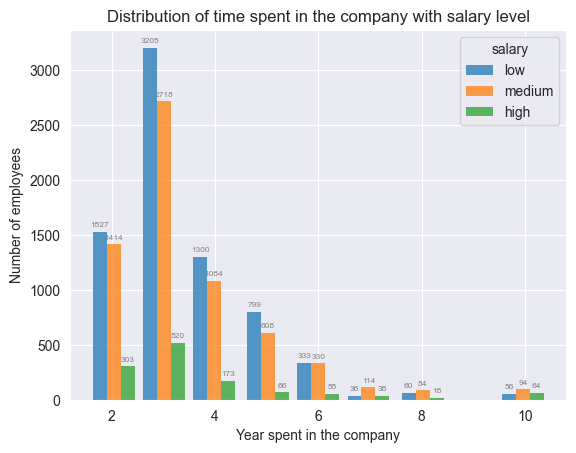

In [26]:
# Distribution of time spent in the company with salary level

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the histogram
fig, ax = plt.subplots()

# Create the histogram
sns.histplot(data = df, x = 'time_spend_company', hue = 'salary', hue_order=['low', 'medium', 'high'], multiple = 'dodge', edgecolor = 'None', ax = ax, shrink = 10)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of time spent in the company with salary level')
ax.set_xlabel('Year spent in the company')
ax.set_ylabel('Number of employees')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 6, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

In [27]:
# Encode categorical variables

# Copy the dataframe
df_en = df.copy()

# Encode the salary column as an ordinal numeric category and ensure it is int64
df_en['salary'] = (df_en['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes).astype('int64')

# Dummy encode the department column
df_en = pd.get_dummies(df_en, drop_first = False, dtype = 'int64')

# Display the new dataframe
df_en.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_Accounting,department_HR,department_IT,department_Management,department_Marketing,department_Product,department_R&D,department_Sales,department_Support,department_Technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


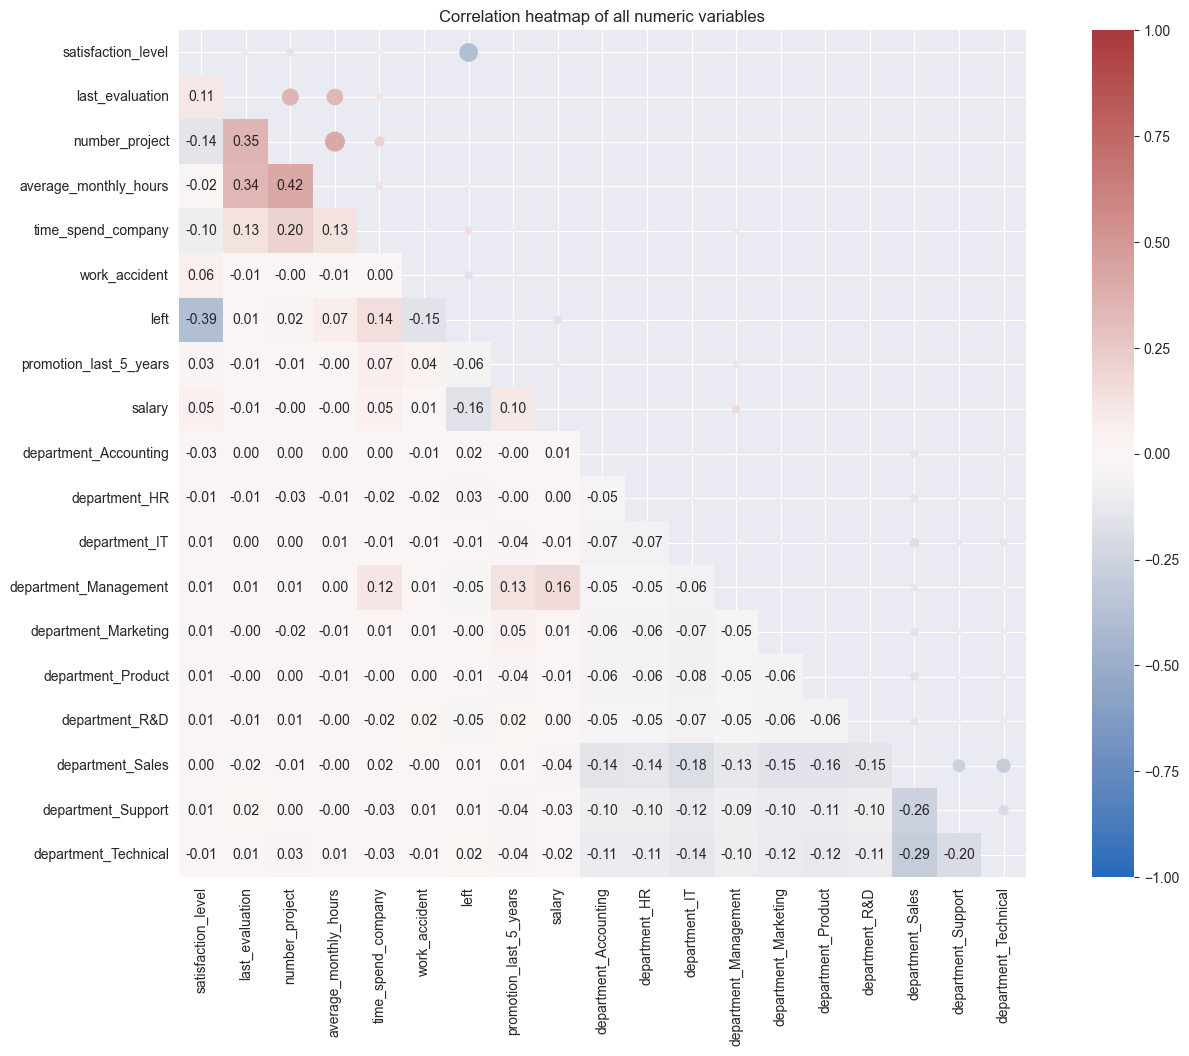

In [28]:
# Check correlations between variables

# Identify and exclude non-numeric columns
numeric_columns = df_en.select_dtypes(include = ['float64', 'int64']).columns

# Calculate correlations using numeric columns only
correlation_df = df_en[numeric_columns].corr()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype = bool))

# Plot the correlation heatmap for the lower triangle
plt.figure(figsize = (17, 11))
sns.heatmap(data=correlation_df, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', fmt = '.2f')

# Get the colormap and normalisation
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(-1, 1)  # Normalise based on the correlation range

# Overlay circles on the upper triangle
for i in range(len(correlation_df.columns)):
    for j in range(i + 1, len(correlation_df.columns)):
        # Get the correlation value
        corr_val = correlation_df.iloc[i, j]
        # Define the circle's radius based on the correlation value
        radius = abs(corr_val) * 0.5  # Adjust multiplier for better scaling
        # Get the color from the colormap
        color = cmap(norm(corr_val))  # Get RGBA color
        # Calculate circle position
        x, y = j + 0.5, i + 0.5
        # Plot circle
        plt.gca().add_patch(plt.Circle((x, y), radius, color = color))

# Ensure aspect ratio is equal to make circles appear round
plt.gca().set_aspect('equal', 'box')

# Set the title
plt.title('Correlation heatmap of all numeric variables')

# Display the plot
plt.show()

# Constructing Stage

During the construction stage, we build and test models to address the business problem. Key tasks include constructing models, evaluating model performance, and selecting the best model for the problem.

## Model selection

Given that the target variable is categorical, we will construct a logistic regression model and three tree-based models, a decision tree, a random forest and an XGBoost. We will evaluate the performance of each model and select the best one for predicting employee retention. We will also identify the most influential factors contributing to employee attrition.

### Logistic regression model

We construct a logistic regression model to predict employee retention. We evaluate the model using accuracy, precision, recall, f1-score and support metrics. We also plot the confusion matrix to visualise the model's performance.

In the training set, the logistic regression model achieved an accuracy of 0.79. The precision, recall and f1-score for who is to leave are 0.61, 0.36 and 0.45, respectively. The model performed similarly on the test set, with an accuracy of 0.8. The precision, recall and f1-score who is to leave are 0.63, 0.38 and 0.47, respectively.

The confusion matrix of the training set shows that the model correctly predicted 8,485 employees who stayed and 1,023 employees who left. However, it misclassified 1,834 employees who left as staying and 657 employees who stayed as leaving. For the test set, the confusion matrix shows similar results. The model correctly predicted 2,129 employees who stayed and 264 employees who left. However, it misclassified 450 employees who left as staying and 157 employees who stayed as leaving. Both models performed suboptimally in predicting employees who left. We will explore tree-based models to improve accuracy.

Next, we identify the coefficients of each feature to determine their impact on employee retention. We interpret the coefficients to understand the relationship between features and the target variable. We then build a recommendation system based on the model's findings for Human Resources to make informed decisions.

In [29]:
# Isolate the target variable logistic regression
y = df_en['left']

# Select the features
X = df_en.drop('left', axis = 1)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

# Construct a logistic regression model
logistic = LogisticRegression(random_state = 42, max_iter = 1000)

In [30]:
# Fit the logistic regression model to the training data
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Classification report for the training set:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      9142
           1       0.61      0.36      0.45      2857

    accuracy                           0.79     11999
   macro avg       0.72      0.64      0.66     11999
weighted avg       0.77      0.79      0.77     11999



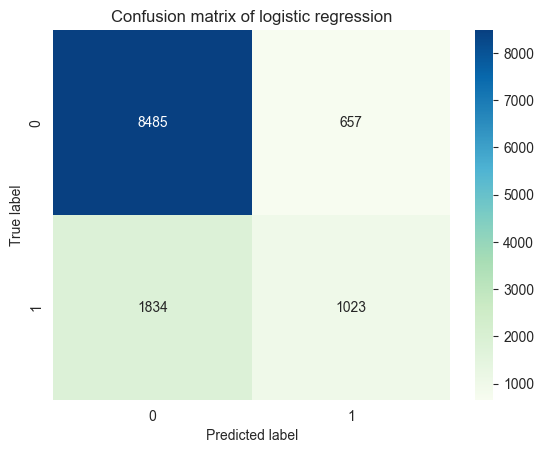

In [31]:
# Predict the label for the training set for logistic regression
y_pred = logistic.predict(X_train)

# Print a classification report
report = classification_report(y_train, y_pred)
print('Classification report for the training set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_train, y_pred, labels = logistic.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = logistic.classes_, yticklabels = logistic.classes_)
plt.title('Confusion matrix of logistic regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Classification report for the test set:

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2286
           1       0.63      0.37      0.47       714

    accuracy                           0.80      3000
   macro avg       0.73      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



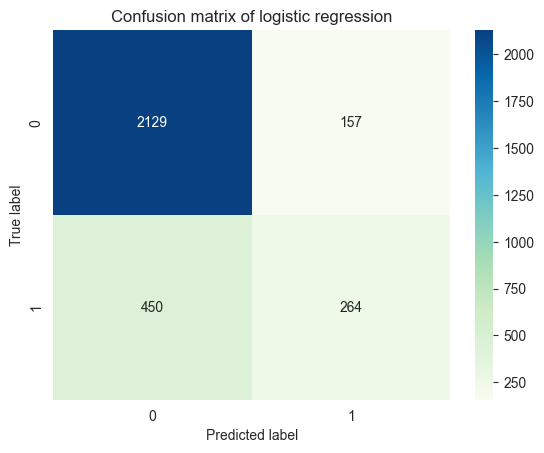

In [32]:
# Predict the label for the test set for logistic regression
y_pred = logistic.predict(X_test)

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report for the test set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels = logistic.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = logistic.classes_, yticklabels = logistic.classes_)
plt.title('Confusion matrix of logistic regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

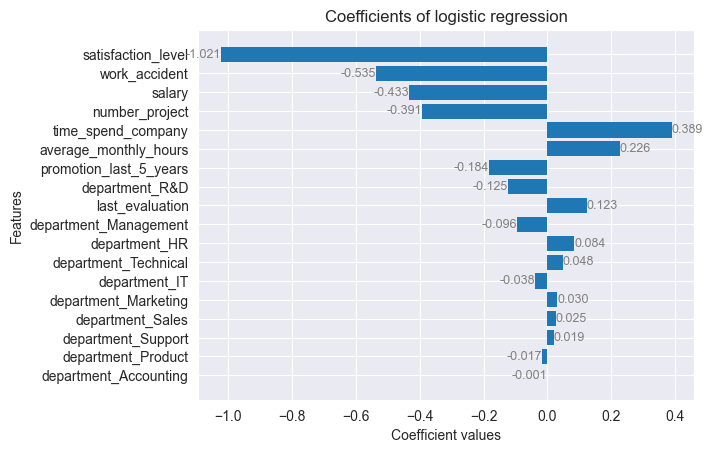

In [33]:
# Coefficients of logistic regression

# Get feature names
feature_names = df_en.drop('left', axis=1).columns

# Get the coefficients of the model
coefficients = logistic.coef_[0]

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value for better visualisation
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by = 'Absolute coefficient', ascending = True).reset_index(drop = True)

# Plot the coefficients
plt.figure()
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], edgecolor = 'None')

# Set the title and labels
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Coefficients of logistic regression')

# Annotate each bar with its coefficient value, avoid showing text for zero coefficients
for bar, coef in zip(bars, coef_df['Coefficient']):
    if coef != 0:  # Only annotate bars where the coefficient is not zero
        if coef < 0:
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{coef:.3f}', ha = 'right', va = 'center', fontsize = 9, color = 'gray')
        else:
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{coef:.3f}', ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Show the plot
plt.show()

### Decision tree model

The decision tree model achieved an accuracy of 0.97 on the training set. The precision, recall, f1-score and AUC are 0.97, 0.91, 0.94 and 0.95, respectively. The model performed similarly on the test set, with an accuracy of 0.97. The precision, recall, f1-score and AUC are 0.97, 0.92, 0.94 and 0.96, respectively.

We plot the decision tree to visualise the model's decision-making process. We identify the most important features in predicting employee retention. We interpret the decision tree to understand the relationship between features and the target variable. We then build a recommendation system to assist Human Resources in their decision-making process.

Next, we evaluate the decision tree model using the confusion matrix. The model correctly predicted 9,065 employees who stayed and 2,608 employees who left in the training set. However, it misclassified 249 employees who left as staying and 77 employees who stayed as leaving. For the test set, the model correctly predicted 2,265 employees who stayed and 654 employees who left. However, it misclassified 60 employees who left as staying and 21 employees who stayed as leaving. The decision tree model performed well in predicting employees who left.

In [34]:
# Isolate the target variable for decision tree
y = df_en['left']

# Select features for the model
X = df_en.drop('left', axis = 1)

# Construct a decision tree model
tree_clf = DecisionTreeClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune for the model
params = {'max_depth' : [3, 5, 10],
          'min_samples_leaf' : [30, 50, 100],
          'min_samples_split' : [30, 50, 100]
          }

# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# Instantiate GridSearch
tree = GridSearchCV(tree_clf, params, scoring = scoring, cv = 4, refit = 'roc_auc')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [35]:
# Generate a summary of the results from a GridSearchCV object for training a model
def make_results(model_name: str, model_object: GridSearchCV, metric: str) -> pd.DataFrame:
    '''
    Parameters:
        model_name (str): Name to be displayed for the model in the output table
        model_object (GridSearchCV): A fitted GridSearchCV object
        metric (str): Metrics to use for selecting the best model

    Returns:
        pd.DataFrame: A dataframe with precision, recall, F1, accuracy, and AUC scores for the model with the best mean metric score across all validation folds
    '''
    
    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'auc': 'mean_test_roc_auc'
                   }
    
    # Validate the input metric
    if metric not in metric_dict:
        raise ValueError(f"Invalid metric '{metric}'. Choose from 'accuracy', 'precision', 'recall', 'f1', or 'auc'.")
    
    # Get all the results from the CV and put them in a DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the DataFrame with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax()]
    
    # Extract Accuracy, precision, recall, and F1 score from that row
    results = {'model': model_name,
               'accuracy': best_estimator_results.get('mean_test_accuracy', None),
               'precision': best_estimator_results.get('mean_test_precision', None),
               'recall': best_estimator_results.get('mean_test_recall', None),
               'f1': best_estimator_results.get('mean_test_f1', None),
               'auc': best_estimator_results.get('mean_test_roc_auc', None)
               }
    
    # Create table of results
    table = pd.DataFrame([results])
    
    return table

In [36]:
# Generate a table of test scores
def get_scores(model_name: str, model, X_test_data, y_test_data):
    '''
    Parameters:
        model_name (str): Name of the model for display in the output table
        model: A fitted GridSearchCV or any estimator object with predict method
        x_test_data: numpy array or DataFrame of features for testing
        y_test_data: numpy array or Series of true labels for testing

    Returns:
        pandas DataFrame: Contains precision, recall, F1, accuracy, and AUC scores for the model
    '''
    # Make predictions on test data
    preds = model.predict(X_test_data)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    auc = roc_auc_score(y_test_data, preds)

    # Create DataFrame to store scores
    scores_df = pd.DataFrame({
        'model': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'auc': [auc]
    })

    return scores_df

In [37]:
# Fit the decision tree model to the training data
tree.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [30, 50, ...], 'min_samples_split': [30, 50, ...]}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1': make_scorer(f...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict'), ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [38]:
# Print the best parameters and score for decision tree
print(f'Best parameters: {tree.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 100}


In [39]:
# Check predicted and actual labels for the test set for decision tree

# Print a sample of predicted labels
print(tree.predict(X_test)[:30])

# Print a sample of actual labels
print(y_test[:30].values)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]


In [40]:
# Display performance metrics for decision tree
tree_train_results = make_results('decision tree train', tree, 'auc')
tree_train_results

,model,accuracy,precision,recall,f1,auc
0,decision tree train,0.968998,0.957665,0.910047,0.933239,0.948734


In [41]:
# Make predictions on the test data for decision tree
tree_test_scores = get_scores('decision tree test', tree, X_test, y_test)
tree_test_scores

,model,accuracy,precision,recall,f1,auc
0,decision tree test,0.973,0.968889,0.915966,0.941685,0.95339


Classification report for the training set:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.97      0.91      0.94      2857

    accuracy                           0.97     11999
   macro avg       0.97      0.95      0.96     11999
weighted avg       0.97      0.97      0.97     11999



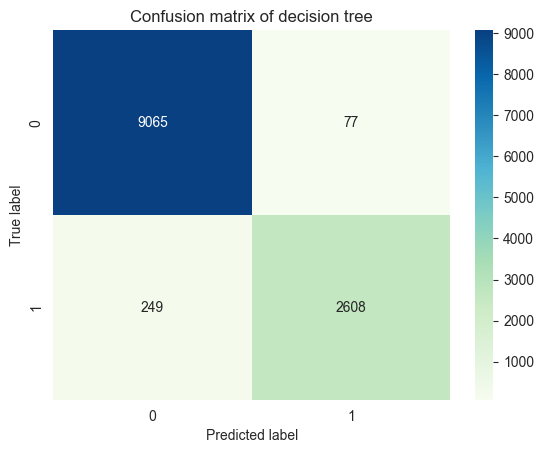

In [42]:
# Predict the labels for the train set for decision tree
y_pred = tree.predict(X_train)

# Print a classification report
report = classification_report(y_train, y_pred)
print('Classification report for the training set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_train, y_pred, labels = tree.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = tree.classes_, yticklabels = tree.classes_)
plt.title('Confusion matrix of decision tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Classification report for the test set:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.97      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



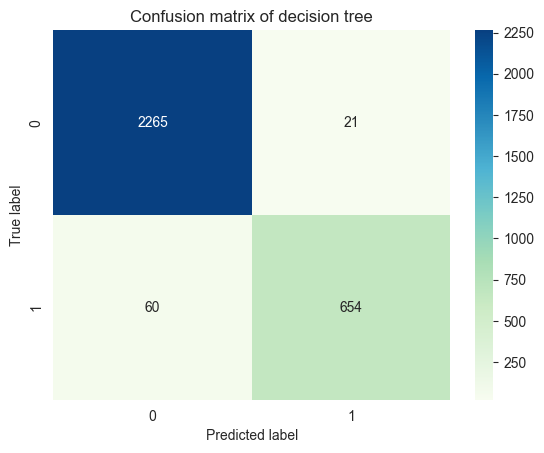

In [43]:
# Predict the labels for the test set for decision tree
y_pred = tree.predict(X_test)

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report for the test set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels = tree.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = tree.classes_, yticklabels = tree.classes_)
plt.title('Confusion matrix of decision tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

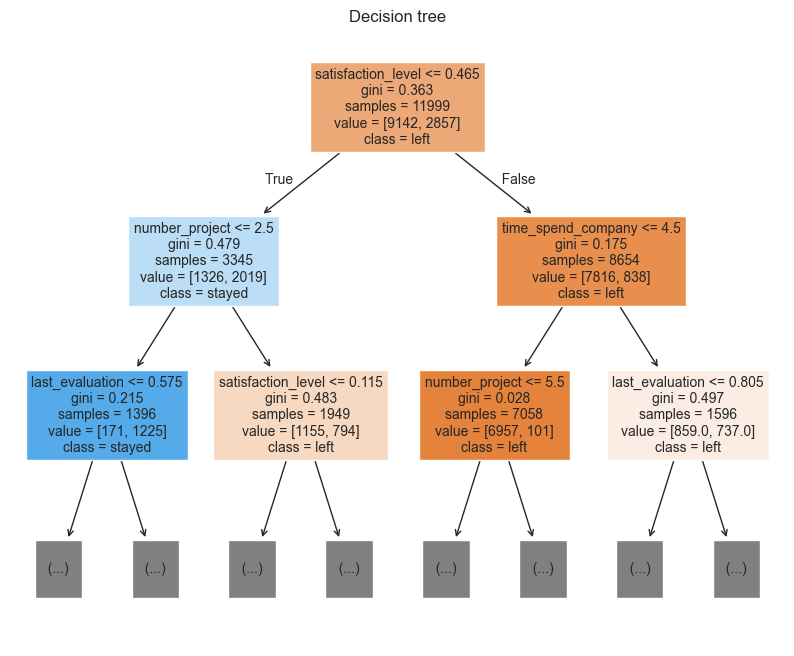

In [44]:
# Plot the decision tree
plt.figure(figsize = (10, 8))                       # Adjust figure size as needed
plot_tree(tree.best_estimator_,                     # The best estimator from GridSearchCV
          max_depth = 2,                            # Maximum depth of the tree to plot
          fontsize = 10,                            # Font size for text in the plot
          feature_names = X.columns,                # Names of the features if available
          class_names = {1: 'stayed', 0: 'left'},   # Class labels for binary classification
          filled = True);                           # Fill nodes with colors
plt.title('Decision tree')                          # Add a title to the plot

# Display the plot
plt.show()

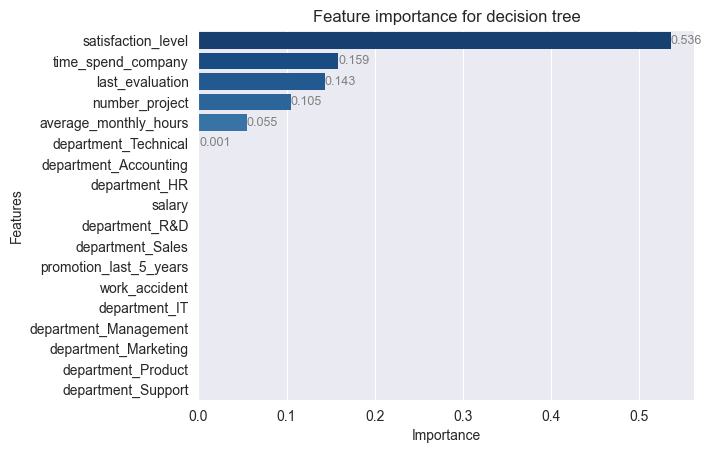

In [45]:
# Feature importance for decision tree
best_estimator = tree.best_estimator_

# Extract feature importances into a Series with feature names as index
feature_importance = pd.Series(best_estimator.feature_importances_, index = X.columns)

# Create a DataFrame to hold the importances, with feature names as index
tree_importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = tree_importance.sort_values(by = 'gini_importance', ascending = False)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importance
plt.figure()
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature importance for decision tree')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        plt.text(importance, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

### Random forest model

The random forest model achieved an accuracy of 0.97 on the training set. The precision, recall, f1-score and AUC are 0.97, 0.99, 0.94 and 0.95, respectively. The model performed similarly on the test set, with an accuracy of 0.97. The precision, recall, f1-score and AUC are 0.97, 0.91, 0.94 and 0.95, respectively.

We plot confusion matrices for the training and test sets to visualise the model's performance. The model correctly predicted 9,069 employees who stayed and 2,600 employees who left in the training set. However, it misclassified 257 employees who left as staying and 73 employees who stayed as leaving. For the test set, the model correctly predicted 2,267 employees who stayed and 649 employees who left. However, it misclassified 65 employees who left as staying and 19 employees who stayed as leaving. The random forest model performed well in predicting employees who left.

Next, we identify the most important features in predicting employee retention using the random forest model. We interpret the model's findings to understand the relationship between features and the target variable. We then the build a recommendation system based on the model's findings for Human Resources to make informed decisions.

In [46]:
# Isolate the target variable for random forest
y = df_en['left']

# Select features for the model
X = df_en.drop('left', axis = 1)

# Construct a random forest model
forest_clf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune for the random forest
params = {'max_depth' : [3, 5, 10],
             'max_features' : [0.2, 0.5, 0.8],
             'min_samples_leaf' : [30, 50, 100],
             'min_samples_split' : [30, 50, 100]
            }

# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# Instantiate GridSearch
forest = GridSearchCV(forest_clf, params, scoring = scoring, cv = 4, refit = 'roc_auc')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [47]:
# Fit the random forest to the training data
forest.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [0.2, 0.5, ...], 'min_samples_leaf': [30, 50, ...], 'min_samples_split': [30, 50, ...]}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1': make_scorer(f...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict'), ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
# Print the best parameters and score for the random forest
print(f'Best parameters: {forest.best_params_}')

Best parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 30, 'min_samples_split': 30}


In [49]:
# Check predicted and actual labels for the test set for random forest

# Print a sample of predicted labels
print(forest.predict(X_test)[:30])

# Print a sample of actual labels
print(y_test[:30].values)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]


In [50]:
# Display performance metrics for random forest
forest_train_results = make_results('random forest train', forest, 'auc')
forest_train_results

,model,accuracy,precision,recall,f1,auc
0,random forest train,0.971582,0.969766,0.908997,0.938354,0.950069


In [51]:
# Make predictions on the test data for random forest
forest_test_scores = get_scores('random forest test', forest, X_test, y_test)
forest_test_scores

,model,accuracy,precision,recall,f1,auc
0,random forest test,0.972,0.971557,0.908964,0.939219,0.950326


Classification report of the training set:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.97      0.91      0.94      2857

    accuracy                           0.97     11999
   macro avg       0.97      0.95      0.96     11999
weighted avg       0.97      0.97      0.97     11999



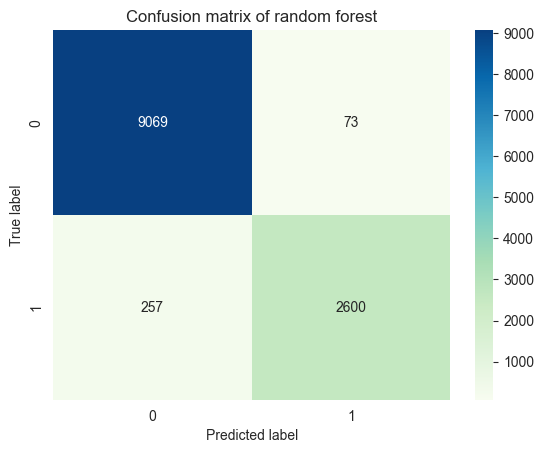

In [52]:
# Predict the labels for the train set for the random forest
y_pred = forest.predict(X_train)

# Print a classification report
report = classification_report(y_train, y_pred)
print('Classification report of the training set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_train, y_pred, labels = forest.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = forest.classes_, yticklabels = forest.classes_)
plt.title('Confusion matrix of random forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Classification report of the test set:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.97      0.91      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



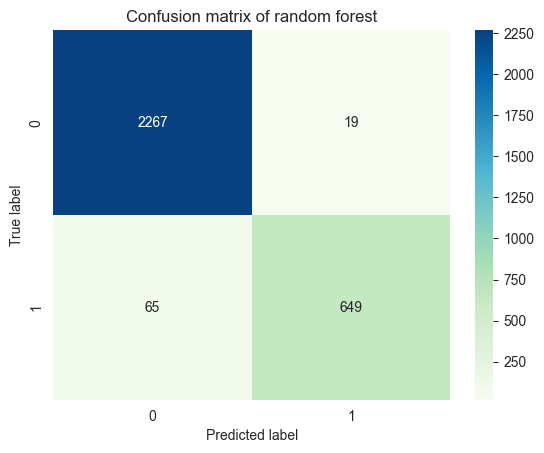

In [53]:
# Predict the labels for the test set for the random forest
y_pred = forest.predict(X_test)

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report of the test set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels = forest.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = forest.classes_, yticklabels = forest.classes_)
plt.title('Confusion matrix of random forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

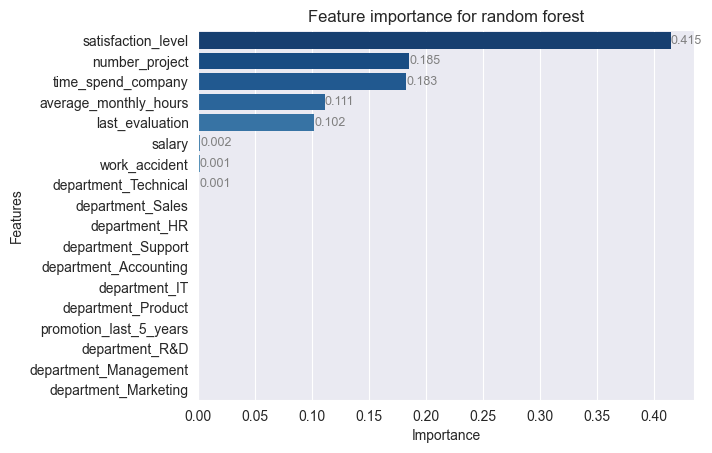

In [54]:
# Feature importance for random forest
best_estimator = forest.best_estimator_

# Extract feature importances
feature_importance = best_estimator.feature_importances_

# Create a DataFrame to hold the importances, with feature names as index
forest_importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = forest_importance.sort_values(by = 'gini_importance', ascending = False)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importances
plt.figure()
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature importance for random forest')
plt.xlabel("Importance")
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        plt.text(importance, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

### XGBoost model

The XGBoost model achieved an accuracy of 0.98 on the training set. The precision, recall, f1-score and AUC are 0.98, 0.99, 0.99 and 0.95, respectively. The model performed similarly on the test set, with an accuracy of 0.97. The precision, recall, f1-score and AUC are 0.96, 0.92, 0.94 and 0.95, respectively.

We plot confusion matrices for the training and test sets to visualise the model's performance. The model correctly predicted 9,075 employees who stayed and 2,661 employees who left in the training set. However, it misclassified 196 employees who left as staying and 67 employees who stayed as leaving. For the test set, the model correctly predicted 2,2259 employees who stayed and 658 employees who left. However, it misclassified 56 employees who left as staying and 27 employees who stayed as leaving. The XGBoost model performed well in predicting employees who left.

Next, we identify the most important features in predicting employee retention using the XGBoost model. We interpret the model's findings to understand the relationship between features and the target variable. We then build a recommendation system based on the model's findings for Human Resources to make informed decisions.

In [55]:
# Isolate the target variable for XGBoost
y = df_en['left']

# Select features for the model
X = df_en.drop('left', axis = 1)

# Construct an XGBoost model
boost_clf = XGBClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune for the XGBoost
params = {'max_depth': [3, 5, 10],
          'min_child_weight': [30, 50, 100],
          'learning_rate': [0.1, 0.3, 0.5],
          }

# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# Instantiate GridSearch
boost = GridSearchCV(boost_clf, params, scoring = scoring, cv = 4, refit = 'roc_auc')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [56]:
# Fit the XGBoost model to the training data
boost.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.3, ...], 'max_depth': [3, 5, ...], 'min_child_weight': [30, 50, ...]}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1': make_scorer(f...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict'), ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [57]:
# Print the best parameters and score for the XGBoost
print(f'Best parameters: {boost.best_params_}')
print(f'Best ROC-AUC score: {boost.best_score_}')

Best parameters: {'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 30}
Best ROC-AUC score: 0.9549676901305574


In [58]:
# Check predicted and actual labels for the test set for XGBoost

# Print a sample of predicted labels
print(boost.predict(X_test)[:30])

# Print a sample of actual labels
print(y_test[:30].values)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0]


In [59]:
# Display performance metrics for XGBoost
forest_train_results = make_results('random forest train', boost, 'auc')
forest_train_results

,model,accuracy,precision,recall,f1,auc
0,random forest train,0.972998,0.964469,0.920546,0.94194,0.954968


In [60]:
# Make predictions on the test data for XGBoost
forest_test_scores = get_scores('random forest test', boost, X_test, y_test)
forest_test_scores

,model,accuracy,precision,recall,f1,auc
0,random forest test,0.972667,0.960641,0.922969,0.941429,0.955579


Classification report for the training set:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.98      0.94      0.96      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999



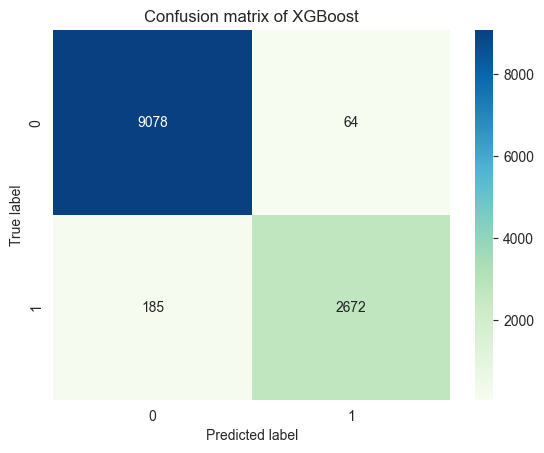

In [61]:
# Predict the labels for the train set for XGBoost
y_pred = boost.predict(X_train)

# Print a classification report
report = classification_report(y_train, y_pred)
print('Classification report for the training set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_train, y_pred, labels = boost.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = boost.classes_, yticklabels = boost.classes_)
plt.title('Confusion matrix of XGBoost')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Classification report for the test set:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



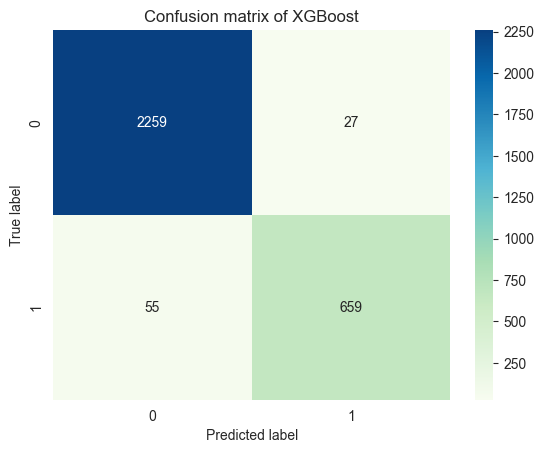

In [62]:
# Predict the labels for the test set for XGBoost
y_pred = boost.predict(X_test)

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report for the test set:')
print()
print(report)

# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels = boost.classes_)

# Plot confusion matrix with Seaborn
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = boost.classes_, yticklabels = boost.classes_)
plt.title('Confusion matrix of XGBoost')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

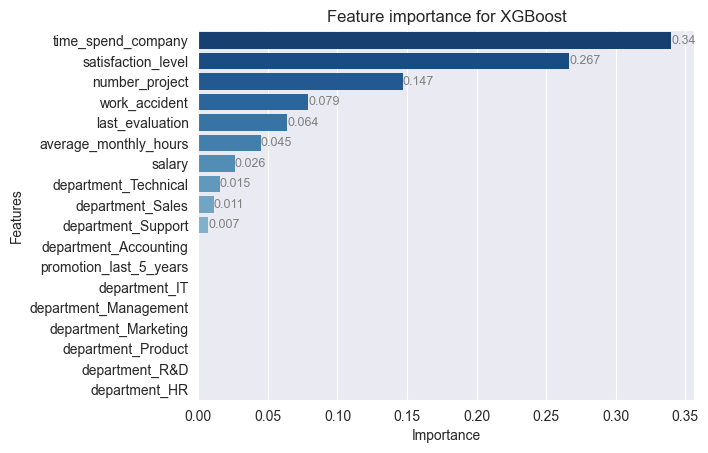

In [63]:
# Feature importance for XGBoost
best_estimator = boost.best_estimator_

# Extract feature importances
feature_importance = best_estimator.feature_importances_

# Create a DataFrame to hold the importances, with feature names as index
boost_importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = boost_importance.sort_values(by = 'gini_importance', ascending = False)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importances
plt.figure()
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature importance for XGBoost')
plt.xlabel("Importance")
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        plt.text(importance, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

# Executing Stage

During the executing stage, every step is carefully documented, including data processing, models construction, analysis, and predictions. The best model is chosen after a thorough evaluation of its performance, while also considering potential biases. Feedback is collected, and adjustments are made as needed to clearly present the results and incorporate recommendations.

What we have found:

- The random forest and XGBoost models outperformed the decision tree and logistic regression models, with the XGBoost slightly outperforming the random forest.
- The most influential factors in predicting employee attrition include satisfaction level, last evaluation, time spent at the company, number of projects, and average monthly hours.
- Employees who are less satisfied are more likely to leave the company.
- Employees who work more than 200 hours per month are more likely to leave the company.
- Employees who have been with the company for four years are more likely to leave than those with less tenure.
- Employees working on more than six projects are more likely to leave the company.

We recommend the following steps to enhance employee retention at Salifort Motors:

- Inform employees about the company's overtime pay policies if they are unfamiliar.
- Clarify expectations regarding workload and time off if they are not explicit.
- Limit the number of projects employees can work on.
- Either reward employees for working longer hours or remove the requirement to do so.
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation into the dissatisfaction among four-year tenured employees.
- Evaluate employees based on a scale that proportionately rewards contributions and effort, rather than solely on the basis of working more than 200 hours per month.
- Facilitate company-wide and team-specific discussions to understand and improve the company's work culture.

Due to the limitation of the project, we did not but potentially would:

- Present findings and communicate the results of the logistic regression, decision tree, and random forest models, highlighting the most important features in predicting employee retention.
- Receive feedback from stakeholders and incorporate their suggestions to refine and enhance the analysis.
- Address any concerns or questions raised by stakeholders and make necessary revisions to the analysis.
- Ensure that the final deliverables meet the needs and expectations of the Human Resources department at Salifort Motors.

## Conclusion

In this project, we leveraged the PACE framework to deliver data-driven recommendations on employee retention to the Human Resources department at Salifort Motors. We implemented the stages of planning, analysing, constructing and executing to address the business problem effectively.

The XGBoost model outperformed the logistic regression, decision tree and random forest models in predicting employee attrition. The most influential factors in predicting employee retention include satisfaction level, last evaluation, time spent at the company, number of projects, and average monthly hours. Employees who are less satisfied, work more than 200 hours per month, have been with the company for four years, or work on more than six projects are more likely to leave the company.

Recommendations to enhance employee retention at Salifort Motors include informing employees about the company's overtime pay policies, clarifying expectations regarding workload and time off, limiting the number of projects employees can work on, rewarding employees for working longer hours, considering promotions for long-tenured employees, evaluating employees based on a proportional scale, and facilitating discussions to improve the company's work culture.

Overall, this project has provided valuable insights into employee retention at Salifort Motors. By implementing the recommendations, the Human Resources department can make informed decisions to enhance employee satisfaction and retention rates. We look forward to collaborating with Salifort Motors on future projects and providing further support to achieve their business objectives.